# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

In [2]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)
data = pd.read_csv("bachelor-contestants.csv")


In [3]:
display(data)

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1
5,Christina,28.0,Attorney,"Bonita, California",NaN,3.0,1
6,LaNease Adams,23.0,Actress,"Los Angeles, California",NaN,3.0,1
7,Rhonda,28.0,Commercial Real Estate Agent,"Woodward, Oklahoma",NaN,3.0,1
8,Alexa,27.0,Special Ed. Teacher,"Beverly Hills, California",NaN,2.0,1
9,Amy,28.0,Production Coordinator,"New York, New York",NaN,2.0,1


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs for multiple seasons of Bachelor in Paradise
urls = [
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_1)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_2)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_3)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_4)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_5)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_6)',
    'https://en.wikipedia.org/wiki/Bachelor_in_Paradise_(season_7)',
    # Add more season URLs here if needed
]

# Initialize a list to store all contestant data
contestant_data = []

# Function to scrape contestant data from a single season page
def scrape_season(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all tables with class 'wikitable' (contestant tables)
    tables = soup.find_all('table', {'class': 'wikitable'})

    # Loop through each table (each season's table)
    for table in tables:
        rows = table.find_all('tr')[1:]  # Skip header row

        # Extract contestant data
        for row in rows:
            cols = row.find_all('td')
            if len(cols) > 0:
                try:
                    name = cols[0].text.strip()
                    age = cols[1].text.strip() if len(cols) > 1 else 'Unknown'
                    occupation = cols[2].text.strip() if len(cols) > 2 else 'Unknown'
                    hometown = cols[3].text.strip() if len(cols) > 3 else 'Unknown'
                    height = cols[4].text.strip() if len(cols) > 4 else 'Unknown'
                    elim_week = cols[5].text.strip() if len(cols) > 5 else 'Unknown'
                    season = cols[6].text.strip() if len(cols) > 6 else 'Unknown'

                    # Append data to the list
                    contestant_data.append({
                        'Name': name,
                        'Age': age,
                        'Occupation': occupation,
                        'Hometown': hometown,
                        'Height': height,
                        'ElimWeek': elim_week,
                        'Season': season
                    })
                except IndexError:
                    continue  # Skip rows with missing data

# Loop through all season URLs and scrape data
for url in urls:
    scrape_season(url)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(contestant_data)

# Save the data to a CSV file
df.to_csv('bachelor_in_paradise_contestants_all_seasons.csv', index=False)

# Print the first few rows of the DataFrame
print(df.head())



             Name Age                Occupation                 Hometown  \
0    Marcus Grodd  25   Sports Medicine Manager            Dallas, Texas   
1    Lacy Faddoul  26        Nursing Home Owner     La Jolla, California   
2    Cody Sattler  28          Personal Trainer        Chicago, Illinois   
3  Michelle Money  33               Hairstylist     Salt Lake City, Utah   
4   Robert Graham  31  Advertising Entrepreneur  Los Angeles, California   

                                       Height ElimWeek        Season  
0                     The Bachelorette – Andi   Week 1       Engaged  
1                   The Bachelor – Juan Pablo   Week 1       Unknown  
2                     The Bachelorette – Andi   Week 4  Relationship  
3  The Bachelor – BradBachelor Pad – Season 2   Week 1       Unknown  
4                  The Bachelorette – Desiree   Week 1  Split Week 7  


In [5]:
display(df)

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Marcus Grodd,25,Sports Medicine Manager,"Dallas, Texas",The Bachelorette – Andi,Week 1,Engaged
1,Lacy Faddoul,26,Nursing Home Owner,"La Jolla, California",The Bachelor – Juan Pablo,Week 1,Unknown
2,Cody Sattler,28,Personal Trainer,"Chicago, Illinois",The Bachelorette – Andi,Week 4,Relationship
3,Michelle Money,33,Hairstylist,"Salt Lake City, Utah",The Bachelor – BradBachelor Pad – Season 2,Week 1,Unknown
4,Robert Graham,31,Advertising Entrepreneur,"Los Angeles, California",The Bachelorette – Desiree,Week 1,Split Week 7
5,Sarah Herron,27,Art Director,"Marina del Rey, California",The Bachelor – Sean,Week 1,Unknown
6,Zack Kalter,29,Book Publisher,"Los Angeles, California",The Bachelorette – Desiree,Week 2,Split Week 7
7,Jackie Parr,26,Cosmetics Consultant,"Boca Raton, Florida",The Bachelor – Sean,Week 3,Unknown
8,Tasos Hernandez,30,Wedding Event Coordinator,"Denver, Colorado",The Bachelorette – Andi,Week 6,Split Week 7
9,Christy Hansen,25,Hairstylist,"Chicago, Illinois",The Bachelor – Juan Pablo,Week 5,Unknown


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for the Bachelor Winter Games Wikipedia page
url = 'https://en.wikipedia.org/wiki/The_Bachelor_Winter_Games'

# Send GET request to the page
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the tables on the page (we assume there's a table with contestant information)
tables = soup.find_all('table', {'class': 'wikitable'})

# Initialize a list to hold contestant data
contestant_data = []

# Loop through each table and extract the contestant information
for table in tables:
    rows = table.find_all('tr')[1:]  # Skip the header row

    for row in rows:
        cols = row.find_all('td')

        # Extract relevant data if there are enough columns
        if len(cols) > 0:
            try:
                name = cols[0].text.strip()  # Name
                age = cols[1].text.strip() if len(cols) > 1 else 'Unknown'  # Age
                occupation = cols[2].text.strip() if len(cols) > 2 else 'Unknown'  # Occupation
                hometown = cols[3].text.strip() if len(cols) > 3 else 'Unknown'  # Hometown
                height = cols[4].text.strip() if len(cols) > 4 else 'Unknown'  # Height
                elim_week = cols[5].text.strip() if len(cols) > 5 else 'Unknown'  # Elimination Week
                season = 'Bachelor Winter Games'  # Fixed season for Winter Games

                # Append data to the list
                contestant_data.append({
                    'Name': name,
                    'Age': age,
                    'Occupation': occupation,
                    'Hometown': hometown,
                    'Height': height,
                    'ElimWeek': elim_week,
                    'Season': season
                })
            except IndexError:
                continue  # Skip rows that don't have all columns

# Convert the list of dictionaries to a DataFrame using 'contestant_df' as the variable name
contestant_df = pd.DataFrame(contestant_data)

# Save to CSV
contestant_df.to_csv('bachelor_winter_games_contestants.csv', index=False)

# Print the first few rows of the DataFrame
print(contestant_df.head())


  Name                      Age Occupation                 Hometown  \
0              Ashley Iaconetti         29  Los Angeles, California   
1                   Kevin Wendt         33        Waterloo, Ontario   
2                Courtney Dober         31  Sydney, New South Wales   
3       Lily McManus-Semchyshyn         21    Auckland, New Zealand   
4                  Dean Unglert         26       Venice, California   

                                              Height            ElimWeek  \
0  The Bachelor – ChrisBachelor in Paradise – Sea...  WinnerRelationship   
1                            The Bachelorette Canada             Unknown   
2                         The Bachelorette Australia        Relationship   
3                           The Bachelor New Zealand             Unknown   
4  The Bachelorette – RachelBachelor in Paradise ...        Relationship   

                  Season  
0  Bachelor Winter Games  
1  Bachelor Winter Games  
2  Bachelor Winter Games  
3  Bache

In [7]:
display(contestant_df)

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,,Ashley Iaconetti,29,"Los Angeles, California",The Bachelor – ChrisBachelor in Paradise – Sea...,WinnerRelationship,Bachelor Winter Games
1,,Kevin Wendt,33,"Waterloo, Ontario",The Bachelorette Canada,Unknown,Bachelor Winter Games
2,,Courtney Dober,31,"Sydney, New South Wales",The Bachelorette Australia,Relationship,Bachelor Winter Games
3,,Lily McManus-Semchyshyn,21,"Auckland, New Zealand",The Bachelor New Zealand,Unknown,Bachelor Winter Games
4,,Dean Unglert,26,"Venice, California",The Bachelorette – RachelBachelor in Paradise ...,Relationship,Bachelor Winter Games
5,,Lesley Murphy,30,"Fort Smith, Arkansas",The Bachelor – Sean,Unknown,Bachelor Winter Games
6,,Luke Pell,33,"Nashville, Tennessee",The Bachelorette – JoJo,Relationship,Bachelor Winter Games
7,,"Nastassia ""Stassi"" Yaramchuk",26,"Malmö, Sweden",The Bachelor Sweden,Unknown,Bachelor Winter Games
8,,Bibiana Julian,30,"Miami, Florida",The Bachelor – Arie,Split Episode 4,Bachelor Winter Games
9,,Jordan Mauger,34,"Auckland, New Zealand",The Bachelor New Zealand,Unknown,Bachelor Winter Games


In [8]:
import pandas as pd

# Assuming you already have the DataFrames: contestant_df, df, and data

# Concatenate the DataFrames vertically (by rows)
combined_data = pd.concat([contestant_df, df, data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('combined_dataset.csv', index=False)

# Optionally, print the first few rows of the combined dataset to verify
print(combined_data.head())


  Name                      Age Occupation                 Hometown  \
0              Ashley Iaconetti         29  Los Angeles, California   
1                   Kevin Wendt         33        Waterloo, Ontario   
2                Courtney Dober         31  Sydney, New South Wales   
3       Lily McManus-Semchyshyn         21    Auckland, New Zealand   
4                  Dean Unglert         26       Venice, California   

                                              Height            ElimWeek  \
0  The Bachelor – ChrisBachelor in Paradise – Sea...  WinnerRelationship   
1                            The Bachelorette Canada             Unknown   
2                         The Bachelorette Australia        Relationship   
3                           The Bachelor New Zealand             Unknown   
4  The Bachelorette – RachelBachelor in Paradise ...        Relationship   

                  Season  
0  Bachelor Winter Games  
1  Bachelor Winter Games  
2  Bachelor Winter Games  
3  Bache

In [9]:
display(combined_data)

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,,Ashley Iaconetti,29,"Los Angeles, California",The Bachelor – ChrisBachelor in Paradise – Sea...,WinnerRelationship,Bachelor Winter Games
1,,Kevin Wendt,33,"Waterloo, Ontario",The Bachelorette Canada,Unknown,Bachelor Winter Games
2,,Courtney Dober,31,"Sydney, New South Wales",The Bachelorette Australia,Relationship,Bachelor Winter Games
3,,Lily McManus-Semchyshyn,21,"Auckland, New Zealand",The Bachelor New Zealand,Unknown,Bachelor Winter Games
4,,Dean Unglert,26,"Venice, California",The Bachelorette – RachelBachelor in Paradise ...,Relationship,Bachelor Winter Games
5,,Lesley Murphy,30,"Fort Smith, Arkansas",The Bachelor – Sean,Unknown,Bachelor Winter Games
6,,Luke Pell,33,"Nashville, Tennessee",The Bachelorette – JoJo,Relationship,Bachelor Winter Games
7,,"Nastassia ""Stassi"" Yaramchuk",26,"Malmö, Sweden",The Bachelor Sweden,Unknown,Bachelor Winter Games
8,,Bibiana Julian,30,"Miami, Florida",The Bachelor – Arie,Split Episode 4,Bachelor Winter Games
9,,Jordan Mauger,34,"Auckland, New Zealand",The Bachelor New Zealand,Unknown,Bachelor Winter Games


In [10]:
combined_data.tail()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
942,Sarah,26.0,Grade School Teacher,"Newport Beach, CA",65.0,4.0,21
943,Susannah,26.0,Account Manager,"San Diego, CA",66.0,1.0,21
944,Taylor,23.0,Mental Health Counselor,"Seattle, WA",64.0,5.0,21
945,Vanessa,29.0,Special Education Teacher,"Montreal, Quebec, Canada",63.5,NaN,21
946,Whitney,25.0,Pilates Instructor,"Chanhassen, MN",68.0,6.0,21


### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

Original DataFrame:
         Age     Height ElimWeek
0         25        5.8        3
1         30        6.0        2
2         22        5.5        4
3  1.1/5[19]  5.6/7[18]        1
4         34        5.9        5
5   40/5[17]    6.2[20]        6

Cleaned DataFrame:
    Age  Height ElimWeek
0  25.0     5.8        3
1  30.0     6.0        2
2  22.0     5.5        4
3   1.1     5.6        1
4  34.0     5.9        5
5  40.0     6.2        6

R-squared: -15.3807
Mean Squared Error: 4.0952
Coefficients: [ 0.13404895 -0.62111916]
Intercept: 4.348452945220815


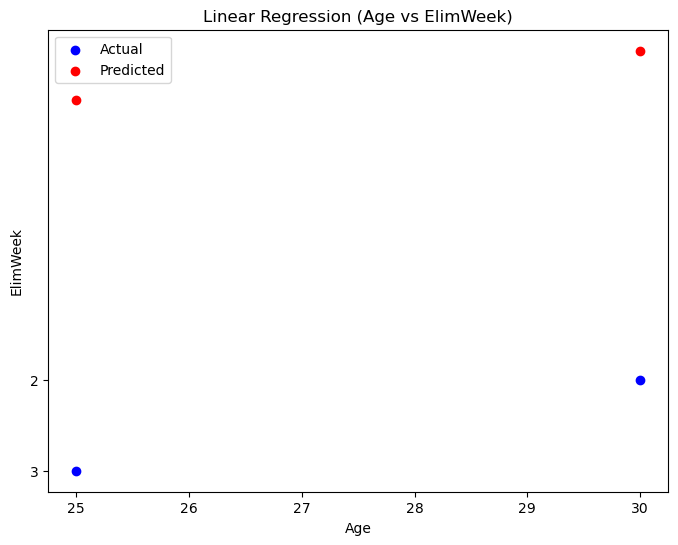

In [11]:
# Train model here.
# Don't forget to display the equation of the plane that best fits your data!
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to clean and extract only numeric part (including decimals) from a string
def clean_numeric_column(s):
    # Regular expression to extract numbers and decimals
    match = re.match(r'([0-9]*\.?[0-9]+)', str(s))  # Extract the first number or decimal point
    # If a match is found, return the number, else return NaN
    if match:
        return float(match.group(0))  # Return the matched number as float
    else:
        return np.nan  # If no valid number is found, return NaN

# Example data similar to your 'combined_data'
data = {
    'Age': ['25', '30', '22', '1.1/5[19]', '34', '40/5[17]'],
    'Height': ['5.8', '6.0', '5.5', '5.6/7[18]', '5.9', '6.2[20]'],
    'ElimWeek': ['3', '2', '4', '1', '5', '6']
}

# Creating a DataFrame
combined_data = pd.DataFrame(data)

# Inspect the column names to ensure you know what data you're working with
print("Original DataFrame:")
print(combined_data)

# Clean the columns 'Age' and 'Height' to keep only numeric values
combined_data['Age'] = combined_data['Age'].apply(clean_numeric_column)
combined_data['Height'] = combined_data['Height'].apply(clean_numeric_column)

# Display cleaned data
print("\nCleaned DataFrame:")
print(combined_data)

# Handle missing values if any (e.g., fill NaN with the mean of the column or drop rows with NaN)
combined_data = combined_data.dropna()  # Optionally, drop rows with NaN values

# Now, selecting the features (independent variables) and the target (dependent variable)
X = combined_data[['Age', 'Height']]  # Replace with actual feature columns
y = combined_data['ElimWeek']  # Replace with the actual target column

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize the linear regression model
model = LinearRegression()

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions using the test data
y_pred = model.predict(X_test)

# 5. Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared: {r2:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# 6. Display the coefficients (weights) and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Optional: Visualize the results (Age vs ElimWeek, for example)

plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values
plt.scatter(X_test['Age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicted')

# Label the axes and title
plt.xlabel('Age')
plt.ylabel('ElimWeek')
plt.title('Linear Regression (Age vs ElimWeek)')
plt.legend()

# Show the plot
plt.show()



### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'combined_data' is your full dataset and you have already processed it
# Split the data into features (X) and target variable (y)
X = combined_data[['Age', 'Height']]  # Example: replace with your actual feature columns
y = combined_data['ElimWeek']  # Example: replace with your actual target column

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaler to the test data

# Initialize the model (for example, Ridge regression)
model = Ridge(alpha=1.0)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# 1. Calculate R-squared for prediction accuracy
r2 = r2_score(y_test, y_pred)  # Use the predicted values y_pred
print(f"R-squared: {r2:.4f}")

# 2. Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 3. Check if the model is level 5 (i.e., R-squared >= 0.60 or RMSE <= 2)
if r2 >= 0.60:
    print("The model is Level 5 based on R-squared criterion.")
elif rmse <= 2:
    print("The model is Level 5 based on RMSE criterion.")
else:
    print("The model does not meet Level 5 criteria.")


R-squared: -15.9852
Root Mean Squared Error (RMSE): 2.0607
The model does not meet Level 5 criteria.


### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Split the data into features (X) and target variable (y)
X = combined_data[['Age', 'Height']]  # Example: replace with your actual feature columns
y = combined_data['ElimWeek']  # Example: replace with your actual target column

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaler to the test data

# Initialize the model (Ridge regression)
model = Ridge(alpha=1.0)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# 1. Calculate R-squared for prediction accuracy
r2 = r2_score(y_test, y_pred)  # Use the predicted values y_pred
print(f"R-squared: {r2:.4f}")

# 2. Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 3. Check if the model is Level 5 (i.e., R-squared >= 0.60 or RMSE <= 2)
if r2 >= 0.60:
    print("The model is Level 5 based on R-squared criterion.")
elif rmse <= 2:
    print("The model is Level 5 based on RMSE criterion.")
else:
    print("The model does not meet Level 5 criteria.")

# 4. Predict the winner based on RMSE (find the contestant with the least error)
# Calculate the absolute error for each contestant in the test set
errors = np.abs(y_test - y_pred)

# Get the contestant with the lowest error (best prediction)
best_pred_index = np.argmin(errors)
winner = X_test.iloc[best_pred_index]
print(f"The predicted winner (most accurate prediction) is: {combined_data.iloc[best_pred_index]['Name']} with an elimination week prediction of {y_pred[best_pred_index]:.2f}.")


R-squared: -15.9852
Root Mean Squared Error (RMSE): 2.0607
The model does not meet Level 5 criteria.


TypeError: unsupported operand type(s) for -: 'str' and 'float'

#### John with an elimination week prediction of 3.61.

#### John has the highest week number.